In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, losses

print(tf.__version__)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 在线下载汽车效能数据集
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

2.6.0
40960/30286 [========================================] - 0s 2us/step


In [2]:
# 效能（公里数每加仑），气缸数，排量，马力，重量
# 加速度，型号年份，产地
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [3]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
# 统计空白数据,并清除
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset = dataset.dropna()
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [8]:
# 处理类别型数据，其中origin列代表了类别1,2,3,分布代表产地：美国、欧洲、日本
# 其弹出这一列
origin = dataset.pop('Origin')

# 根据origin列来写入新列
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


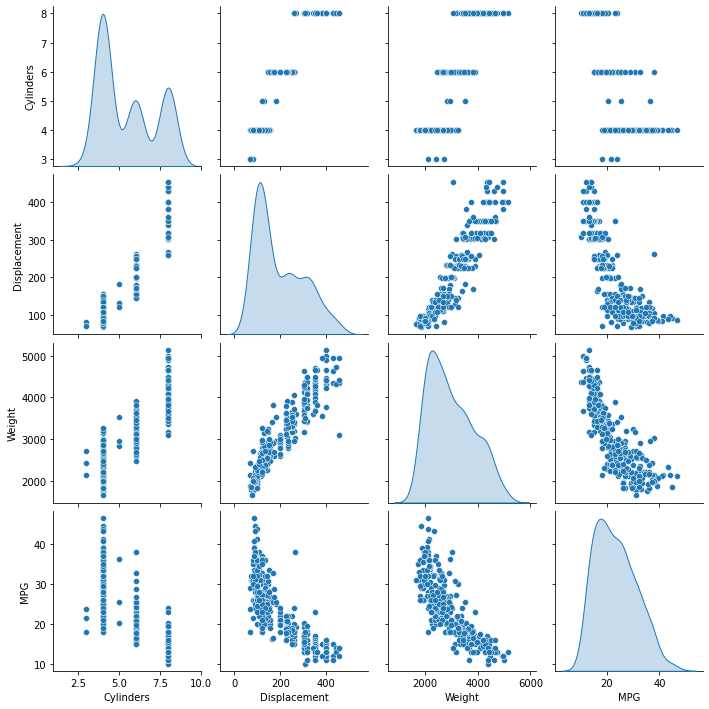

In [10]:
# 切分为训练集和测试集
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#%% 统计数据
sns.pairplot(train_dataset[["Cylinders", "Displacement", "Weight", "MPG"]], diag_kind="kde")

In [11]:
# 查看训练集的输入X的统计数据
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

# 移动MPG油耗效能这一列为真实标签Y
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# 标准化数据
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
    
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

print(normed_train_data.shape,train_labels.shape)
print(normed_test_data.shape, test_labels.shape)

(314, 9) (314,)
(78, 9) (78,)


In [12]:
class Network(keras.Model):
    # 回归网络
    def __init__(self):
        super(Network, self).__init__()
        # 创建3个全连接层
        self.fc1 = layers.Dense(64, activation='relu')
        self.fc2 = layers.Dense(64, activation='relu')
        self.fc3 = layers.Dense(1)

    def call(self, inputs, training=None, mask=None):
        # 依次通过3个全连接层
        x = self.fc1(inputs)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

model = Network()
model.build(input_shape=(None, 9))
model.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  640       
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [13]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
train_db = tf.data.Dataset.from_tensor_slices((normed_train_data.values, train_labels.values))
train_db = train_db.shuffle(100).batch(32)

# 未训练时测试
example_batch = normed_train_data.values[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.18496384],
       [-0.27685782],
       [-0.61765444],
       [-0.38112456],
       [-0.14059342],
       [-0.24822675],
       [-0.16445881],
       [ 0.18985869],
       [-0.1362396 ],
       [-0.04049228]], dtype=float32)

In [14]:
example_result.reshape(-1).shape

(10,)

In [15]:
train_labels[:10].shape

(10,)

In [16]:
tf.keras.losses.MAE(example_result.reshape(-1),train_labels[:10])

<tf.Tensor: shape=(), dtype=float64, numpy=26.360075283274057>

In [17]:
train_mae_losses = []
test_mae_losses = []
for epoch in range(200):
    for step, (x,y) in enumerate(train_db):

        with tf.GradientTape() as tape:
            out = model(x)
            loss = tf.reduce_mean(losses.MSE(y, out))
            mae_loss = tf.reduce_mean(losses.MAE(y, out)) 

        if step % 10 == 0:
            print(epoch, step, float(loss))

        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

    train_mae_losses.append(float(mae_loss))
    out = model(tf.constant(normed_test_data.values))
    test_mae_losses.append(tf.reduce_mean(losses.MAE(test_labels, out)))

0 0 690.7218627929688
1 0 634.5560913085938
2 0 615.30517578125
3 0 429.0967712402344
4 0 405.9081115722656
5 0 376.56243896484375
6 0 224.654541015625
7 0 242.447265625
8 0 178.1256866455078
9 0 164.10946655273438
10 0 89.267578125
11 0 104.43585205078125
12 0 132.74264526367188
13 0 85.98465728759766
14 0 71.88368225097656
15 0 81.16423034667969
16 0 62.22203826904297
17 0 91.40455627441406
18 0 91.19332885742188
19 0 100.05810546875
20 0 45.57807159423828
21 0 74.29637145996094
22 0 87.83018493652344
23 0 68.21163177490234
24 0 58.52356719970703
25 0 48.575889587402344
26 0 73.38702392578125
27 0 60.88404846191406
28 0 63.781341552734375
29 0 70.65277099609375
30 0 63.79592514038086
31 0 72.47793579101562
32 0 71.59239196777344
33 0 69.51496887207031
34 0 75.81658172607422
35 0 56.712955474853516
36 0 70.43425750732422
37 0 65.31954956054688
38 0 68.54719543457031
39 0 47.89826965332031
40 0 94.62261962890625
41 0 77.68748474121094
42 0 56.741390228271484
43 0 69.40568542480469
44 0

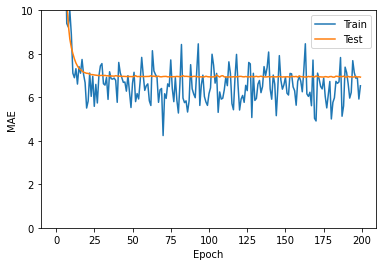

In [18]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(train_mae_losses,  label='Train')

plt.plot(test_mae_losses, label='Test')
plt.legend()
 
plt.ylim([0,10])
plt.legend()
# plt.savefig('auto.svg')
plt.show()